<a href="https://colab.research.google.com/github/nkang917/video-view-time-prediction/blob/main/amazon_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 0 Load packages, load data


In [ ]:
#import neccessary libraries
import numpy as np
import pandas as pd
import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('max_colwidth',100)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TVdata.txt to TVdata.txt


In [ ]:
TV=pd.read_table('TVdata.txt',header=0,sep=',',lineterminator='\n')
TV.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.606,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.500,112.301,51,other award,PG-13,1.710
1,300175,270338.426,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.500,94.983,41,no award,R,3.250
2,361899,256165.867,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.300,115.764,58,other award,R,2.647
3,308314,196622.721,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.600,130.704,94,Oscar,R,1.667
4,307201,159841.652,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.400,105.546,37,other award,R,3.067


# Part 1: Data Exploration

## 1.1 Understand the Raw Dataset

In [ ]:
# check data info
TV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   import_id                      4226 non-null   object 
 5   release_year                   4226 non-null   int64  
 6   genres                         4226 non-null   object 
 7   imdb_votes                     4226 non-null   int64  
 8   budget                         4226 non-null   int64  
 9   boxoffice                      4226 non-null   int64  
 10  imdb_rating                    4226 non-null   float64
 11  duration_in_mins               4226 non-null   float64
 12  metacritic_score               4226 non-null   i

In [ ]:
# check the unique values for each column
TV.nunique()

video_id                         4226
cvt_per_day                      4226
weighted_categorical_position      37
weighted_horizontal_poition        68
import_id                           4
release_year                       97
genres                           1165
imdb_votes                       2282
budget                            253
boxoffice                         410
imdb_rating                        85
duration_in_mins                 4097
metacritic_score                   90
awards                              5
mpaa                                6
star_category                     630
dtype: int64

## 1.2 Understand numerical features

### 1.2.1 Overview

In [ ]:
TV.drop(columns=['video_id']).describe()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,4218.630,7.783,28.104,2001.057,6462.924,2150743.439,2536338.472,5.257,89.556,15.974,0.955
std,13036.080,6.134,11.864,17.497,31596.007,7176604.483,8243516.266,2.123,21.086,26.205,0.955
min,2.188,1.000,1.000,1916.000,0.000,0.000,0.000,0.000,4.037,0.000,0.000
25%,351.169,4.000,20.000,1998.000,81.000,0.000,0.000,4.300,82.602,0.000,0.000
50%,1193.500,6.000,28.000,2008.000,535.000,0.000,0.000,5.800,90.730,0.000,1.000
75%,3356.789,9.000,36.000,2012.000,3053.000,1500000.000,0.000,6.800,99.500,41.000,1.667
max,307127.606,41.000,70.000,2017.000,948630.000,107000000.000,184208848.000,10.000,246.017,100.000,4.000


In [ ]:
# We see there are many erroneous '0' for columns like 'budget', 'boxoffice', 
# so let's check the percentage of '0' for each column
(TV==0).sum(axis=0) / TV.shape[0]

video_id                        0.000
cvt_per_day                     0.000
weighted_categorical_position   0.000
weighted_horizontal_poition     0.000
import_id                       0.000
release_year                    0.000
genres                          0.000
imdb_votes                      0.081
budget                          0.581
boxoffice                       0.756
imdb_rating                     0.081
duration_in_mins                0.000
metacritic_score                0.713
awards                          0.000
mpaa                            0.000
star_category                   0.437
dtype: float64

### 1.2.2 cvt_per_day feature

In [ ]:
####################
# if is binary dependent variable, draw boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2])

Text(0.5, 1.0, 'Historgrams of cvt_per_day before data processing')

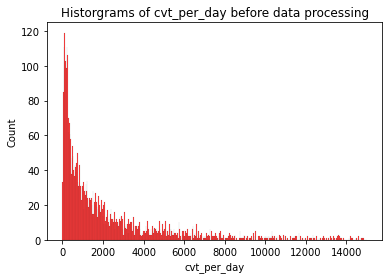

In [ ]:
sns.histplot(data=TV, x='cvt_per_day', binwidth=30, binrange=(0,15000), color='r')
plt.title('Historgrams of cvt_per_day before data processing')

### 1.2.3 Correlation among numerical features

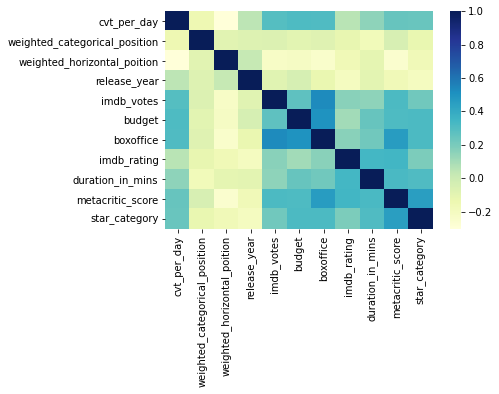

In [ ]:
corr = TV[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition',
           'release_year', 'imdb_votes', 'budget', 'boxoffice' ,'imdb_rating', 
           'duration_in_mins', 'metacritic_score', 'star_category']].corr()
sns.heatmap(corr, cmap="YlGnBu")

In [ ]:
corr

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000,-0.148,-0.302,0.046,0.298,0.316,0.312,0.059,0.152,0.249,0.247
weighted_categorical_position,-0.148,1.000,-0.084,-0.069,-0.064,-0.090,-0.074,-0.116,-0.174,-0.044,-0.123
weighted_horizontal_poition,-0.302,-0.084,1.000,0.027,-0.221,-0.211,-0.245,-0.162,-0.102,-0.255,-0.168
release_year,0.046,-0.069,0.027,1.000,-0.083,-0.040,-0.128,-0.199,-0.097,-0.167,-0.198
imdb_votes,0.298,-0.064,-0.221,-0.083,1.000,0.273,0.531,0.163,0.156,0.322,0.225
budget,0.316,-0.090,-0.211,-0.040,0.273,1.000,0.505,0.106,0.251,0.315,0.322
boxoffice,0.312,-0.074,-0.245,-0.128,0.531,0.505,1.000,0.164,0.226,0.465,0.322
imdb_rating,0.059,-0.116,-0.162,-0.199,0.163,0.106,0.164,1.000,0.344,0.347,0.192
duration_in_mins,0.152,-0.174,-0.102,-0.097,0.156,0.251,0.226,0.344,1.000,0.327,0.309
metacritic_score,0.249,-0.044,-0.255,-0.167,0.322,0.315,0.465,0.347,0.327,1.000,0.452


## 1.3 Understand categorical features

### 1.3.1 Distribution of standard categorical features

In [ ]:
# for categorical vs. numerical, use sns.stripplot
# for categorical vs. categorical, use sns.countplot(hue)

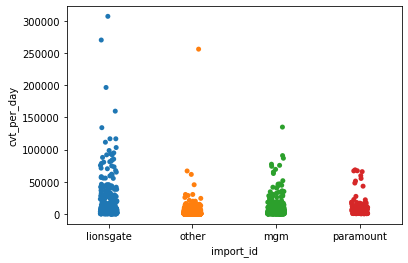

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64


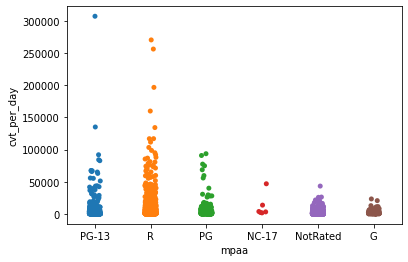

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64


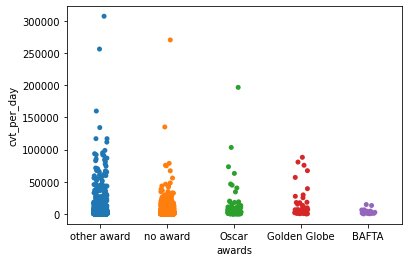

no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: awards, dtype: int64


In [ ]:
sns.stripplot(x='import_id', y='cvt_per_day', data=TV,jitter=True)
plt.show()
print(TV['import_id'].value_counts())

sns.stripplot(x='mpaa', y='cvt_per_day', data=TV,jitter=True)
plt.show()
print(TV['mpaa'].value_counts())

sns.stripplot(x='awards', y='cvt_per_day', data=TV, jitter=True)
plt.show()
print(TV['awards'].value_counts())

### 1.3.2 Distribution of splited genres

Some videos belongs to more than 1 genre, the genre of each video is splited, this would help emphasize the effect of each individual genre.

Action                    739
Adult                       3
Adventure                 363
Animation                 129
Anime                      11
Comedy                   1184
Crime                     437
Documentary               671
Drama                    1677
Fantasy                   243
Foreign/International      64
Holiday                     1
Horror                    762
Independent               393
Kids & Family             280
LGBT                        2
Lifestyle                   7
Music                     171
Musicals                   68
Mystery                   375
Reality                     9
Romance                   591
Sci-Fi                    363
Sport                      77
Thriller                  879
War                       102
Western                   102
dtype: int64


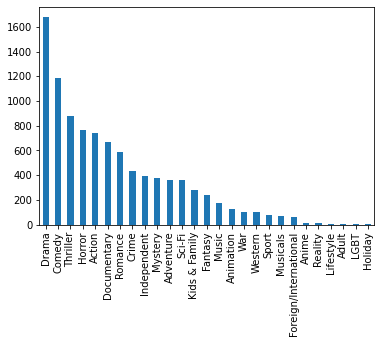

In [ ]:
# generes explore, split the genre of each video
gen_split = TV['genres'].str.get_dummies(sep=',').sum()
print(gen_split)

gen_split.sort_values(ascending=False).plot.bar()

### 1.3.3 Distribution of release_year

The release year of video varies through a wide range. Considering the popularity of a video usually decays over time, the release_year should be bucketed based on the release_year range.

Text(0, 0.5, 'Count')

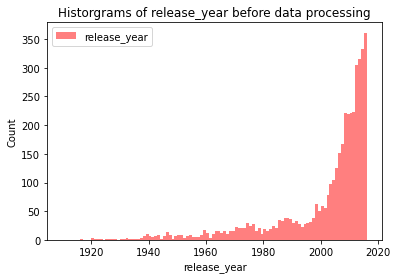

In [ ]:
plt.hist(TV['release_year'].values, bins = range(1910, 2017, 1), alpha = 0.5, color='r', label = 'release_year')
plt.legend(loc ='upper left')
plt.title('Historgrams of release_year before data processing')
plt.xlabel('release_year')
plt.ylabel('Count')


After very basic Exploratory Data Analysis, we have to do some data cleaning and data preprocessing.
We need three steps to finish  this.
First, we need to encode the categorical feature.
Second, we need to imput the missing value for both numeric and categorical feature.
Third, we need to scale out feature, which can be better for our models' performance.



# Part 2: Feature Preprocessing

## 2.1 Categorical features

There are 5 categorical features: import_id, mpaa, awards, genres, and release_year. There is no missing data in them. They can be converted into dummy/indicators.

The first 3 have relatively small sub-types, they can be easily converted to dummies.

The 'genres' have 27 different sub-types, 6 of them are rarely observed (refer to previous section). It's reasonable to group these 6 together.

The release_year is binned into 10 buckets based on the year range between 1917 and 2017.

In [ ]:
# !!!!!!!!!!!!!!!!!!!
# split the data before converting it!!!
# !!!!!!!!!!!!!!!!!!!
#  haven't done yet
# train, test = train_test_split(newTV_sc, test_size=0.15, random_state = 3)

In [ ]:
# Convert 3 Categorical variables into dummy variables
d_import_id = pd.get_dummies(TV['import_id'])
d_mpaa = pd.get_dummies(TV['mpaa'])
d_awards = pd.get_dummies(TV['awards'])

In [ ]:
# Convert 'genres' into dummy variables and combine some rarely observed genres
d_genres=TV['genres'].str.get_dummies(sep=',').astype(np.int64)
d_genres['Misc_genres']=d_genres['Anime']|d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday']
d_genres.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)

In [ ]:
d_genres.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_genres
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
TV['release_year'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

0.100   1974.000
0.200   1991.000
0.300   2001.000
0.400   2006.000
0.500   2008.000
0.600   2010.000
0.700   2012.000
0.800   2013.000
0.900   2014.000
Name: release_year, dtype: float64

In [ ]:
# bin release_year and convert into dummies
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']
year_bin = pd.cut(TV['release_year'], bin_year, labels=year_range)
d_year = pd.get_dummies(year_bin)
d_year.head()

,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0


In [ ]:
# new dataframe, drop the previous categorical features, add new dummy variables, check for null

temp_tv=TV.drop(['import_id', 'mpaa','awards','genres', 'release_year'], axis=1)

newTV = pd.concat([temp_tv, d_import_id, d_mpaa, d_awards, d_genres, d_year], axis=1)
newTV.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,lionsgate,mgm,other,paramount,G,NC-17,NotRated,PG,PG-13,R,BAFTA,Golden Globe,Oscar,no award,other award,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_genres,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,1,3,69614,15000000,42930462,6.500,112.301,51,1.710,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,1,3,46705,15000000,3301046,6.500,94.983,41,3.250,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,1,3,197596,26000000,37397291,7.300,115.764,58,2.647,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,3,4,356339,15000000,15700000,7.600,130.704,94,1.667,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,1,3,46720,27220000,8551228,6.400,105.546,37,3.067,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


## 2.2 Missing data

Among the 10 numerical features (not include video_id), 4 features have over 25% of missing values (shown as '0', which is not possible in reality): budget, boxoffice, metacritic_score, star_category. 2 features have less than 10% of missing data: imdb_votes, imdb_rating.

There are 3242 samples have at least one missing data.

Right Now we have to deal with the missing data. According to the data info, there is no Null value in our dataset.
That's good, but we have to be catious, cause zero value can be a very good candidate for missing data. 
So we have to check the ratio of zero value in our numeric feature

In [ ]:
newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)
newTV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   imdb_votes                     3882 non-null   float64
 5   budget                         1772 non-null   float64
 6   boxoffice                      1032 non-null   float64
 7   imdb_rating                    3882 non-null   float64
 8   duration_in_mins               4226 non-null   float64
 9   metacritic_score               1214 non-null   float64
 10  star_category                  2380 non-null   float64
 11  lionsgate                      4226 non-null   uint8  
 12  mgm                            4226 non-null   u

Filling missing data with mean value

In [ ]:
newTV1=newTV.copy()
newTV1['boxoffice']=newTV1['boxoffice'].fillna(newTV1['boxoffice'].mean())
newTV1['metacritic_score']=newTV1['metacritic_score'].fillna(newTV1['metacritic_score'].mean())
newTV1['star_category']=newTV1['star_category'].fillna(newTV1['star_category'].mean())
newTV1['imdb_votes']=newTV1['imdb_votes'].fillna(newTV1['imdb_votes'].mean())
newTV1['imdb_rating']=newTV1['imdb_rating'].fillna(newTV1['imdb_rating'].mean())
newTV1['budget']=newTV1['budget'].fillna(newTV1['budget'].mean())
newTV1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   imdb_votes                     4226 non-null   float64
 5   budget                         4226 non-null   float64
 6   boxoffice                      4226 non-null   float64
 7   imdb_rating                    4226 non-null   float64
 8   duration_in_mins               4226 non-null   float64
 9   metacritic_score               4226 non-null   float64
 10  star_category                  4226 non-null   float64
 11  lionsgate                      4226 non-null   uint8  
 12  mgm                            4226 non-null   u

There are two most common used scaling method: normalization and standardscaler
If there are no specific requirement for the range of output, we choose to use standardscaler

## 2.3 Feature scaling

The impact of different scaling methods on the model performance is small. In the following model training and selections, the standard scaling (sc) data is used.

In [ ]:
# First way of scaling, Standard scaling
scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
newTV_sc = newTV1.copy()
scaler = preprocessing.StandardScaler()
scaler.fit(newTV_sc[scale_lst])
newTV_sc[scale_lst] = scaler.transform(newTV_sc[scale_lst])
newTV_sc.head()


,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,lionsgate,mgm,other,paramount,G,NC-17,NotRated,PG,PG-13,R,BAFTA,Golden Globe,Oscar,no award,other award,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_genres,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,-1.106,-2.116,1.984,1.470,4.696,0.542,1.079,-0.630,0.033,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,-1.106,-2.116,1.258,1.470,-1.022,0.542,0.257,-1.997,3.434,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,-1.106,-2.116,6.043,3.108,3.898,1.100,1.243,0.327,2.102,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,-0.780,-2.032,11.077,1.470,0.767,1.309,1.952,5.250,-0.063,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,-1.106,-2.116,1.258,3.290,-0.265,0.472,0.758,-2.544,3.029,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Second way of scaling, MinMax scaling
# newTV_mm = newTV.copy()
# mm_scale = preprocessing.MinMaxScaler().fit(newTV_mm[scale_lst])
# newTV_mm[scale_lst] = mm_scale.transform(newTV_mm[scale_lst])

# Part 3: Model Training

In [ ]:
train, test = train_test_split(newTV_sc, test_size=0.15, random_state = 3)
model_train_x = train.drop(['video_id', 'cvt_per_day'], axis = 1)
model_test_x = test.drop(['video_id', 'cvt_per_day'], axis = 1)
model_train_y = train['cvt_per_day']
model_test_y = test['cvt_per_day']

In [ ]:
from sklearn.model_selection import GridSearchCV
def print_grid_search_metrics(gs):
    print("Best score: " + str(gs.best_score_))
    print("Best parameters: ")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

### 3.1 Lasso linear regression

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
parameters = {
    'alpha': np.linspace (1, 201, num=500)
}

lasso_cv = GridSearchCV(Lasso(), parameters, cv=5)
lasso_cv.fit(model_train_x, model_train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([  1.        ,   1.4008016 ,   1.80160321,   2.20240481,
         2.60320641,   3.00400802,   3.40480962,   3.80561...
       191.78156313, 192.18236473, 192.58316633, 192.98396794,
       193.38476954, 193.78557114, 194.18637275, 194.58717435,
       194.98797595, 195.38877756, 195.78957916, 196.19038076,
       196.59118236, 196.99198397, 197.39278557, 197.79358717,
       198.19438878, 198.59519038, 198.99599198, 199.39679359,
       199.79759519, 200.19839679, 200.5991984 , 201.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
        

In [ ]:
print_grid_search_metrics(lasso_cv)

Best score: 0.27184785108562837
Best parameters:
alpha:59.517034068136276


In [ ]:
best_lasso_model = lasso_cv.best_estimator_
best_lasso_model

Lasso(alpha=59.517034068136276, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

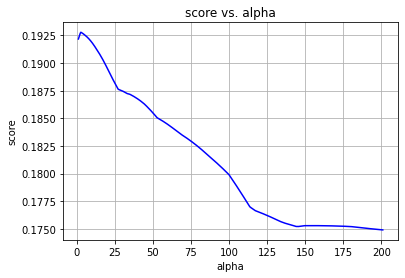

The optimaized alpha and score of Lasso linear is: 


(None, 2.603206412825651, 0.19279104645147038)

In [ ]:
##############################################
# 或者自己写loop找alpha, 这里只用了 1-fold cross-validation
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

lr_train, lr_validate = train_test_split(train, test_size=0.20, random_state = 3)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.linspace (1, 201, num=500)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso_m = Lasso()
    lasso_m.set_params(alpha = a)
    lasso_m.fit(lr_train_x, lr_train_y)
    scores[i] = lasso_m.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso_m
plt.plot(alphas, scores, color='b')
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model1_para = opt_a
print('The optimaized alpha and score of Lasso linear is: '), opt_a, max_score


In [ ]:
###################################
# manually fit model using best alpha
# combine the validate data and training data, use the optimal alpha, re-train the model
lasso_f = Lasso()
lasso_f.set_params(opt_a)
lasso_f.fit(model_train_x, model_train_y)


Lasso(alpha=59.517034068136276, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

## 3.2 Ridge linear regression

In [ ]:
parameters = {
    'alpha': np.linspace (100, 301, num=500)
}

ridge = GridSearchCV(Ridge(), parameters, cv=5)
ridge.fit(model_train_x, model_train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([100.        , 100.40280561, 100.80561122, 101.20841683,
       101.61122244, 102.01402806, 102.41683367, 102.81963928,
       103.22244489, 103.6252505 , 104.02805...
       291.73547094, 292.13827655, 292.54108216, 292.94388778,
       293.34669339, 293.749499  , 294.15230461, 294.55511022,
       294.95791583, 295.36072144, 295.76352705, 296.16633267,
       296.56913828, 296.97194389, 297.3747495 , 297.77755511,
       298.18036072, 298.58316633, 298.98597194, 299.38877756,
       299.79158317, 300.19438878, 300.59719439, 301.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print_grid_search_metrics(ridge)

Best score: 0.27821684133392166
Best parameters:
alpha:268.7755511022044


In [ ]:
best_ridge_model = ridge.best_estimator_
best_ridge_model

Ridge(alpha=268.7755511022044, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

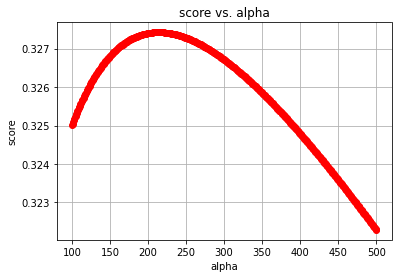

The optimaized alpha and score of Ridge linear is: 


(None, 213.82765531062125, 0.3274262646352598)

In [ ]:
#################################
# Use the same training data set as Lasso (linear features)
lr_train, lr_validate = train_test_split(train, test_size=0.20, random_state = 0)
lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.linspace (100, 500, num=500)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge_m = Ridge()
    ridge_m.set_params(alpha = a)
    ridge_m.fit(lr_train_x, lr_train_y)
    scores[i] = ridge_m.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge_m
plt.plot(alphas, scores, color='r', linestyle='dashed', marker='o',markerfacecolor='r', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model3_para = opt_a
print ('The optimaized alpha and score of Ridge linear is: '), opt_a, max_score

In [ ]:
# add the 15% validate data, use the optimal alpha, re-train the model

ridge_f = Ridge()
ridge_f.set_params(alpha = opt_a)
ridge_f.fit(model_train_x, model_train_y)

# ridge_f is the Ridge model (linear feature), to be tested with test data.

Ridge(alpha=213.82765531062125, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

##3.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor(random_state=3, max_features='sqrt', n_jobs=-1)
parameters = {
    'n_estimators': [60,61,62,63,64,65],
    'max_depth': [8,10,15,16]
    }
random_forest=GridSearchCV(rf, param_grid=parameters, cv=5, n_jobs=-1, pre_dispatch='2*n_jobs')
random_forest.fit(model_train_x,model_train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=3,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1

In [ ]:
print_grid_search_metrics(random_forest)

Best score: 0.4602797610106051
Best parameters:
max_depth:15
n_estimators:62


In [ ]:
best_rf_model = random_forest.best_estimator_
best_rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=62, n_jobs=-1, oob_score=False,
                      random_state=3, verbose=0, warm_start=False)

{'mean_fit_time': array([0.35206885, 0.35535378, 0.35300889, 0.35457268, 0.25361013,
       0.31016016, 0.34390059, 0.34078794, 0.32950382, 0.34341564,
       0.32812562, 0.32828746, 0.42481599, 0.43453598, 0.4296844 ,
       0.44407697, 0.4277638 , 0.44279747, 0.43201165, 0.46459999,
       0.53717389, 0.5453814 , 0.47439737, 0.44303169]), 'std_fit_time': array([0.0033501 , 0.00429309, 0.00628219, 0.02340286, 0.01670966,
       0.04230521, 0.01001011, 0.01109956, 0.03704402, 0.00789323,
       0.05118318, 0.03193176, 0.04982982, 0.04497041, 0.04019903,
       0.0148852 , 0.0344182 , 0.01213333, 0.03891019, 0.0728018 ,
       0.04160357, 0.00916332, 0.04671431, 0.06628587]), 'mean_score_time': array([0.10414805, 0.10500708, 0.10442109, 0.1045918 , 0.10721464,
       0.10584569, 0.10512719, 0.10725555, 0.10768676, 0.10812311,
       0.10558105, 0.10553427, 0.10773578, 0.1070787 , 0.10773845,
       0.10758567, 0.10653048, 0.108741  , 0.10893021, 0.10575113,
       0.10420122, 0.10406156

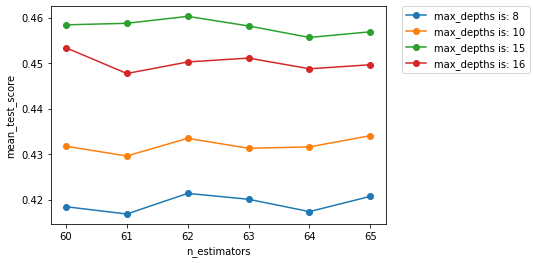

the best parameter for max_depth is: 15
the best parameter for n_estimators is: 62


In [ ]:
result = random_forest.cv_results_
print(result)
max_depth=[8,10,15,16]
n_estimators=[60,61,62,63,64,65]
scores=random_forest.cv_results_['mean_test_score'].reshape(len(max_depth),len(n_estimators))
plt.figure(1)
plt.subplot(1,1,1)
for i,j in enumerate(max_depth):
  plt.plot(n_estimators,scores[i],'-o',label='max_depths is: '+str(j))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('n_estimators')
plt.ylabel('mean_test_score')
plt.show()
print('the best parameter for max_depth is: '+str(random_forest.best_params_['max_depth']))
print('the best parameter for n_estimators is: '+str(random_forest.best_params_['n_estimators']))

# Part 4: Model Evaluation

## 4.1 Evaluate all models

In [ ]:
train_x = model_train_x
train_y = model_train_y
test_x = model_test_x
test_y = model_test_y

In [ ]:
# For lasso
from sklearn.metrics import mean_squared_error
# lasso=Lasso(**lasso_params)
# lasso.fit(train_x,train_y)
pred_y=best_lasso_model.predict(test_x)
lasso_score=best_lasso_model.score(test_x,test_y)
MSE_lasso=mean_squared_error(test_y,pred_y)
RMSE_lasso=np.sqrt(MSE_lasso)
print ('lasso score: ', lasso_score)
print ('Mean square error of lasso: ', MSE_lasso)
print ('Root mean squared error of lasso:', RMSE_lasso)

lasso score:  0.10697940764457048
Mean square error of lasso:  236981452.0422127
Root mean squared error of lasso: 15394.201896890034


In [ ]:
# for ridge
from sklearn.metrics import mean_squared_error
# ridge = Ridge(**ridge_params)
# ridge.fit(train_x, train_y)
pred_y=best_ridge_model.predict(test_x)
ridge_score=best_ridge_model.score(test_x,test_y)
MSE_ridge=mean_squared_error(test_y,pred_y)
RMSE_ridge=np.sqrt(MSE_ridge)
print ('ridge score: ', ridge_score)
print ('Mean square error of ridge: ', MSE_ridge)
print ('Root mean squared error of ridge:', RMSE_ridge)

ridge score:  0.11517352581201823
Mean square error of ridge:  234806973.60560083
Root mean squared error of ridge: 15323.412596598737


In [ ]:
# For randomforest regression
from sklearn.ensemble import RandomForestRegressor
# random_forest = RandomForestRegressor(**rf_params)
# random_forest.fit(train_x, train_y)
pred_y=best_rf_model.predict(test_x)
rf_score=best_rf_model.score(test_x,test_y)
MSE_rf=mean_squared_error(test_y,pred_y)
RMSE_rf=np.sqrt(MSE_rf)
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)

rf score:  0.6058306472561128
Mean square error of rf:  104600976.01714346
Root mean squared error of rf: 10227.46185605908


## 4.2 Model comparison 

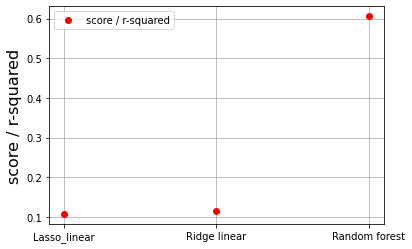

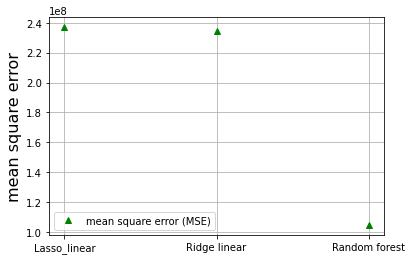

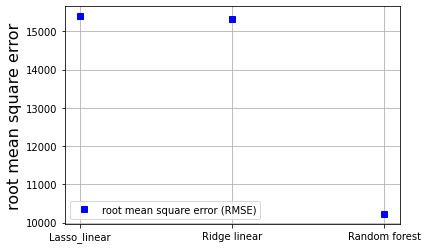

In [ ]:
lst_score = [lasso_score, ridge_score, rf_score]
MSE_lst =  [MSE_lasso, MSE_ridge, MSE_rf]
RMSE_lst =  [RMSE_lasso, RMSE_ridge, RMSE_rf]
model_lst = ['Lasso_linear', 'Ridge linear', 'Random forest']

plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(['score / r-squared'])
# plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r-squared', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(['mean square error (MSE)'])
# plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(['root mean square error (RMSE)'])
# plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)
plt.show()

## 4.3 Feature importance

According to R square, MSE and RMSE, the Random Forest Regression has the best performance

In [ ]:
importances = random_forest.feature_importances_
importances

array([2.94316051e-01, 1.12110932e-01, 2.09423527e-01, 1.85726326e-02,
       1.86171853e-02, 2.41512566e-02, 2.69394460e-02, 4.26898283e-02,
       5.28100657e-02, 4.25517481e-02, 1.42794883e-02, 2.76799462e-02,
       3.61971816e-03, 1.42167907e-04, 9.31554096e-05, 5.50920272e-04,
       2.17539663e-03, 2.08496790e-03, 2.15069889e-03, 2.31687826e-06,
       1.29580774e-03, 6.12763157e-04, 2.90663584e-03, 3.73894365e-03,
       1.49955792e-03, 1.68990072e-03, 1.69814592e-03, 5.13205067e-03,
       2.43685083e-02, 7.14327412e-03, 2.21273251e-03, 1.12173533e-03,
       3.12488214e-05, 1.70703179e-03, 1.96876086e-04, 3.62454911e-03,
       2.17254019e-03, 4.59977202e-04, 1.95945522e-03, 1.13763657e-03,
       2.49455951e-03, 1.59496832e-03, 3.53319230e-03, 6.42332304e-04,
       3.87289242e-03, 4.20128739e-05, 3.31675868e-04, 2.01474778e-03,
       1.29230303e-03, 4.40268211e-03, 3.97548788e-03, 2.21133977e-03,
       3.23834108e-03, 6.07353069e-03, 3.98470040e-03, 6.24413886e-04])

In [ ]:
importances[[0,2,1]]

array([0.29431605, 0.20942353, 0.11211093])

In [ ]:
np.argsort(importances)[::-1]

array([ 0,  2,  1,  8,  7,  9, 11,  6, 28,  5,  4,  3, 10, 29, 53, 27, 49,
       54, 50, 44, 23, 35, 12, 42, 52, 22, 40, 30, 51, 16, 36, 18, 17, 47,
       38, 33, 26, 25, 41, 24, 20, 48, 39, 31, 43, 55, 21, 15, 37, 46, 34,
       13, 14, 45, 32, 19])

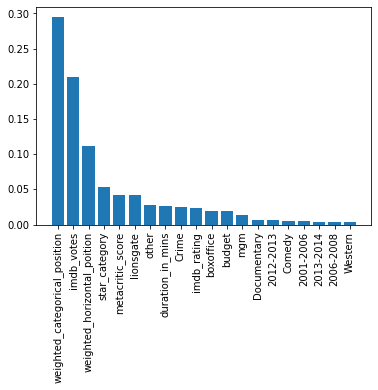

In [ ]:
importances = random_forest.feature_importances_
feature_name = train_x.columns
indices = np.argsort(importances)[::-1]
plt.figure(1)
plt.bar(feature_name[indices[:20]], importances[indices[:20]])
plt.xticks(rotation=90)
plt.show()